
# **Thresholding, Binarization & Adaptive Thresholding**

**In this lesson we'll learn:**
1. Binarized Images
2. Thresholding Methods
3. Adaptive Thresholding
4. SkImage's Threshold Local

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def imshow(image, title="", size=5):
    w, h= image.shape[:2]
    aspect_ratio= w/h
    plt.figure(figsize=(size*aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)

## **Thresholding Methods** 

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Screenshot%202020-11-17%20at%2012.57.55%20am.png)

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Screenshot%202020-11-17%20at%2012.58.09%20am.png)

https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html

In [4]:
!wget https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg

--2024-11-12 10:05:54--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/scan.jpeg
Connecting to 127.0.0.1:12334... connected.
Proxy request sent, awaiting response... 200 OK
Length: 171933 (168K) [image/jpeg]
Saving to: ‘scan.jpeg’

scan.jpeg           100%[===================>] 167.90K   698KB/s    in 0.2s    

2024-11-12 10:05:56 (698 KB/s) - ‘scan.jpeg’ saved [171933/171933]



In [5]:
!mv scan.jpeg images/scan.jpg

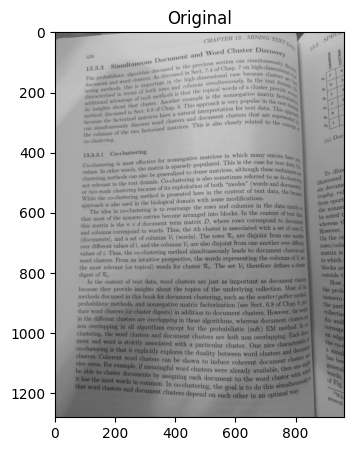

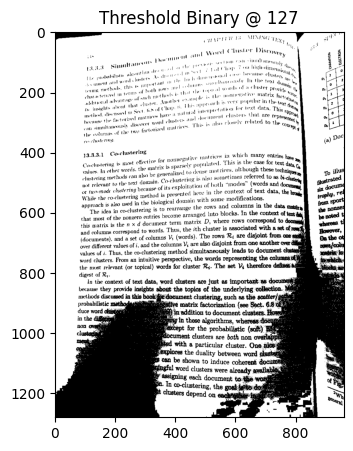

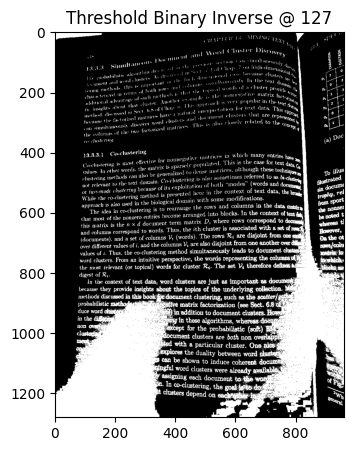

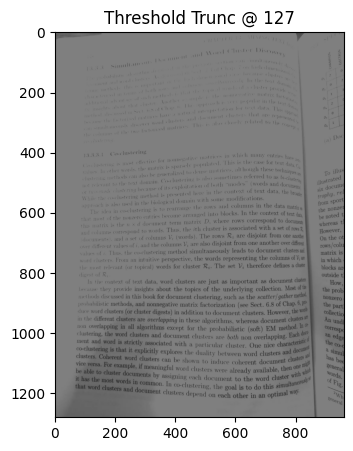

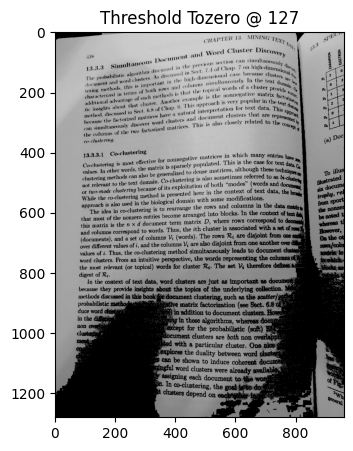

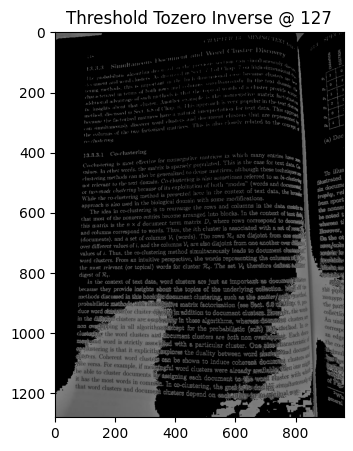

In [20]:
# Load our image as grayscale
image= cv2.imread('images/scan.jpg', 0)
imshow(image, 'Original')

# Values below 127 goes to 0 (black), everything above goes to 255 (white)
ret, thresh= cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow(thresh, 'Threshold Binary @ 127')

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret, thresh= cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
imshow(thresh, 'Threshold Binary Inverse @ 127')

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret, thresh= cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
imshow(thresh, 'Threshold Trunc @ 127')

# Values below 127 go to 0, above 127 are unchanged  
ret, thresh= cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
imshow(thresh, 'Threshold Tozero @ 127')

# Reverse of the above, below 127 is unchanged, above 127 goes to 0
ret, thresh= cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
imshow(thresh, 'Threshold Tozero Inverse @ 127')

In [15]:
thresh1.shape

(1280, 960)

In [16]:
ret

127.0

## **Adaptive Thresholding**

1. ADAPTIVE_THRESH_MEAN_C
2. THRESH_OTSU

**cv2.adaptiveThreshold Parameters**

``**cv2.adaptiveThreshold**(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst``

- **src** – Source 8-bit single-channel image.
- **dst** – Destination image of the same size and the same type as src .
- **maxValue** – Non-zero value assigned to the pixels for which the condition is satisfied. See the details below.
- **adaptiveMethod** – Adaptive thresholding algorithm to use, ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C . See the details below.
- **thresholdType** – Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV .
- **blockSize** – Size of a pixel neighborhood that is used to calculate a threshold value for the pixel: 3, 5, 7, and so on.
- **C** – Constant subtracted from the mean or weighted mean. Normally, it is positive but may be zero or negative as well.


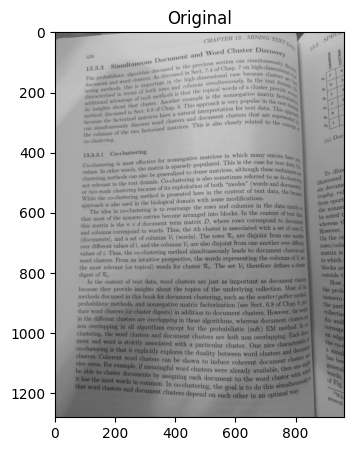

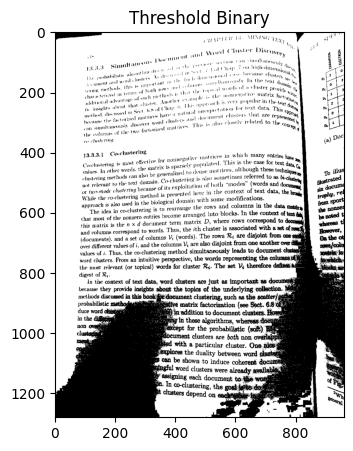

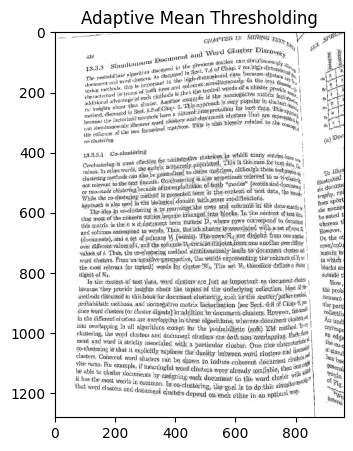

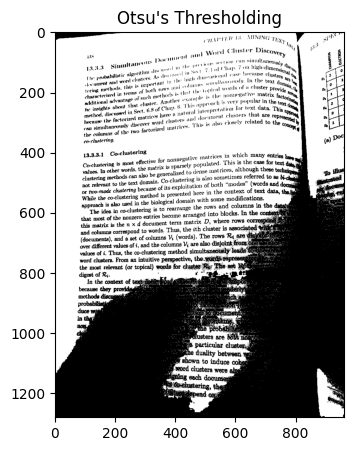

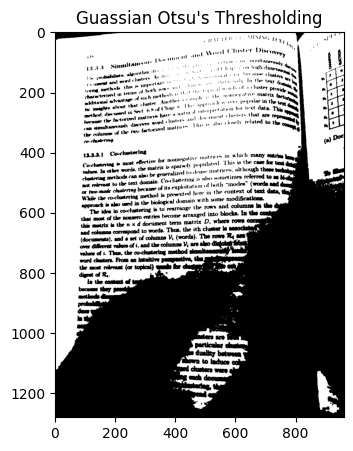

In [32]:
image= cv2.imread('images/scan.jpg', 0)
imshow(image, 'Original')

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh= cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow(thresh, 'Threshold Binary')

# It's good practice to blur images as it removes noise
#image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh= cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)
imshow(thresh, 'Adaptive Mean Thresholding')

ret, thresh= cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow(thresh, "Otsu's Thresholding") 

# Otsu's thresholding after Gaussian filtering
blur= cv2.GaussianBlur(image, (5,5), 0)
ret, thresh= cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow(thresh, "Guassian Otsu's Thresholding")

## **SkImage Threshold Local**


``threshold_local(image, block_size, offset=10)``

The threshold_local function, calculates thresholds in regions with a characteristic size ``block_size`` surrounding each pixel (i.e. local neighborhoods). Each threshold value is the weighted mean of the local neighborhood minus an ``offset`` value


https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding.html

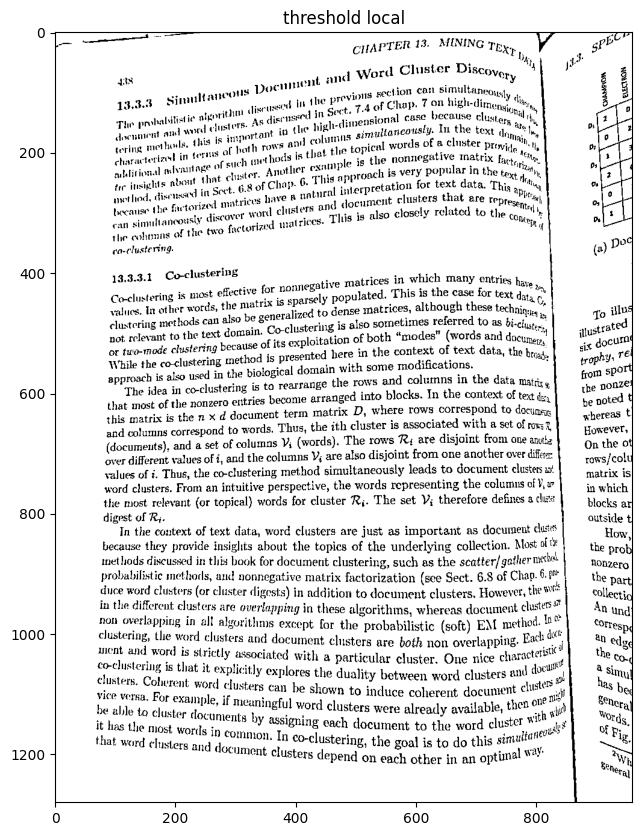

In [45]:
from skimage.filters import threshold_local

image= cv2.imread('images/scan.jpg')

# We get the Value component from the HSV color space 
# then we apply adaptive thresholdingto 
V= cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T= threshold_local(V, block_size=25, offset=15, method='gaussian')

# Apply the threshold operation 
thresh= (V>T).astype(np.uint8)*255
imshow(thresh, 'threshold local', 10)



In [51]:
V.shape, V

((1280, 960),
 array([[115, 115, 115, ..., 205, 184, 164],
        [119, 118, 118, ..., 183, 160, 147],
        [129, 128, 127, ..., 195, 177, 177],
        ...,
        [135, 135, 134, ..., 159, 159, 159],
        [135, 135, 134, ..., 159, 159, 159],
        [135, 135, 134, ..., 159, 159, 159]], dtype=uint8))

In [53]:
T.shape, T

((1280, 960),
 array([[108.83147362, 108.80727877, 108.76681773, ..., 169.44365517,
         169.94243952, 170.19216169],
        [108.9491535 , 108.92514666, 108.88478079, ..., 169.90876502,
         170.4215852 , 170.67869171],
        [109.12475503, 109.10148489, 109.06205291, ..., 170.80157318,
         171.33602125, 171.60452564],
        ...,
        [119.18527671, 119.12219353, 119.00016567, ..., 144.90921682,
         144.79657263, 144.73698738],
        [119.16036446, 119.0961204 , 118.9717016 , ..., 144.90059399,
         144.7861975 , 144.72561369],
        [119.14857354, 119.08370486, 118.95799962, ..., 144.89642777,
         144.78117893, 144.72010932]]))

In [58]:
(V>T).sum()

np.int64(1087927)

In [59]:
1280*960

1228800

**Why Bluring is Important before Thresholding?** 

**Answer - Noise**

![](https://opencv-python-tutroals.readthedocs.io/en/latest/_images/otsu.jpg)

https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html